In [1]:
function walk(num_steps)
    
    x = 0
    
    for i in 1:num_steps
        x += rand( (-1, +1) )
    end
    
    return x
end

walk (generic function with 1 method)

In [2]:
num_steps = 20
walk(num_steps)

-6

In [3]:
experiment(num_steps, num_walks) = [walk(num_steps) for i in 1:num_walks]

experiment (generic function with 1 method)

In [4]:
data = experiment(20, 1000)

data'   # transpose(data) --  ' = transpose

1×1000 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 2  6  -8  -2  -2  -8  4  -4  0  0  0  …  0  0  0  4  0  -2  -2  2  2  0  0

In [5]:
using StatsBase

In [6]:
counts = countmap(data);

In [7]:
using Plots

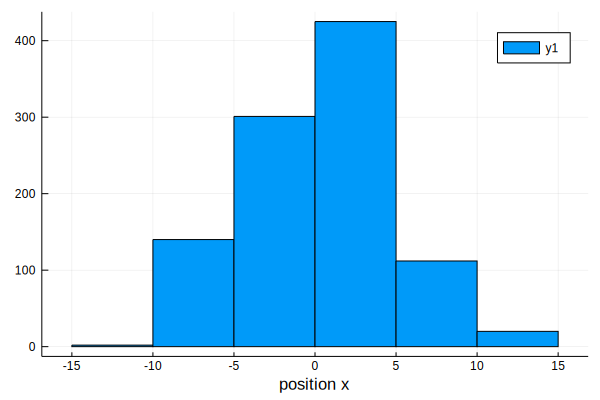

In [8]:
histogram(data, bins=10)  # in Plots.jl package
xlabel!("position x")

In [9]:
using StatsBase

In [10]:
h = fit(Histogram, data)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -15.0:5.0:15.0
weights: [2, 140, 301, 425, 112, 20]
closed: left
isdensity: false

In [11]:
h.weights / sum(h.weights)

6-element Array{Float64,1}:
 0.002
 0.14
 0.301
 0.425
 0.112
 0.02

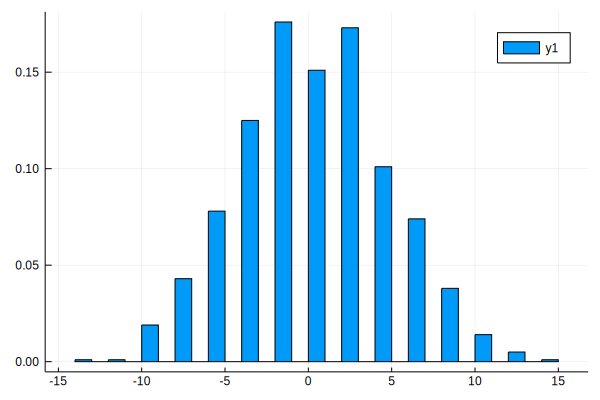

In [12]:
histogram(data, bins=30, normed=true)  # in Plots.jl package


In [13]:
data

1000-element Array{Int64,1}:
  2
  6
 -8
 -2
 -2
 -8
  4
 -4
  0
  0
  0
 -2
  4
  ⋮
  2
  0
  0
  0
  4
  0
 -2
 -2
  2
  2
  0
  0

In [14]:
mean(data)

-0.168

In [15]:
sum(data) / length(data)

-0.168

## Spread away from mean

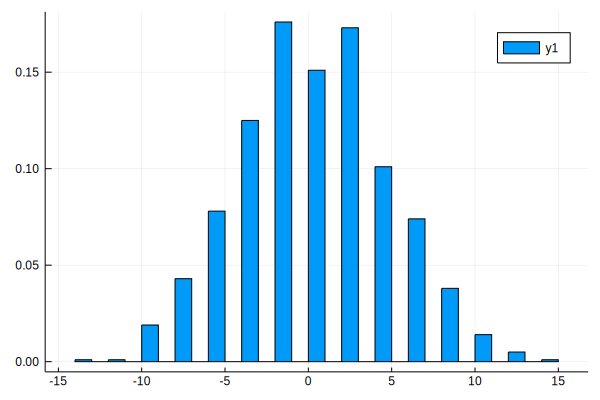

In [16]:
histogram(data, normed=true, bins=30)

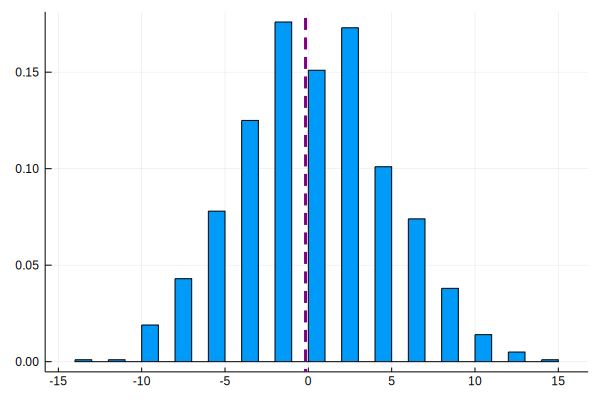

In [17]:
vline!([mean(data)], lw=3, ls=:dash, leg=false, c=:purple)

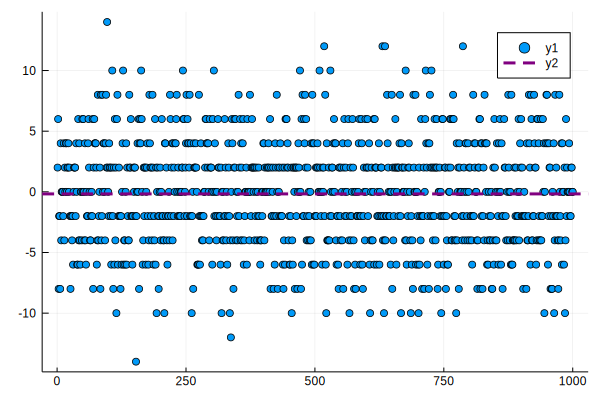

In [18]:
scatter(data)

hline!([mean(data)], lw=3, ls=:dash, c=:purple)




In [19]:
m = mean(data)   # de-mean:  subtract:
centred_data = data .- m;    

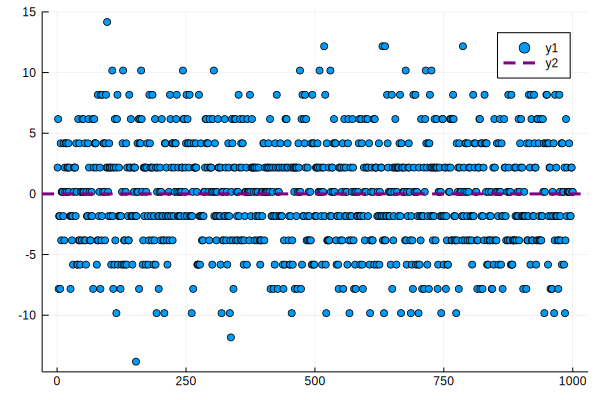

In [20]:
scatter(centred_data)

hline!([mean(centred_data)], lw=3, ls=:dash, c=:purple)



In [21]:
mean(centred_data)  

-3.0758728897239964e-16

`1e-16` is notation for $10^{-16}$

In [22]:
nextfloat(1.0)

1.0000000000000002

In [23]:
nextfloat(1.0) - 1.0   # machine epsilon for double precision -- Float64 

2.220446049250313e-16

In [24]:
abs_data = abs.(centred_data)

1000-element Array{Float64,1}:
 2.168
 6.168
 7.832
 1.832
 1.832
 7.832
 4.168
 3.832
 0.168
 0.168
 0.168
 1.832
 4.168
 ⋮
 2.168
 0.168
 0.168
 0.168
 4.168
 0.168
 1.832
 1.832
 2.168
 2.168
 0.168
 0.168

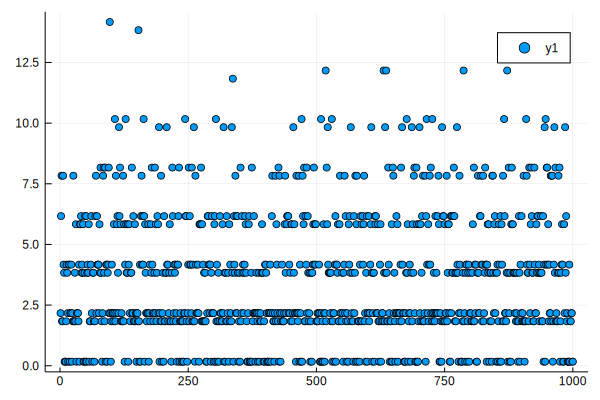

In [25]:
scatter(abs_data)

In [26]:
mean(abs_data)

3.611152000000001

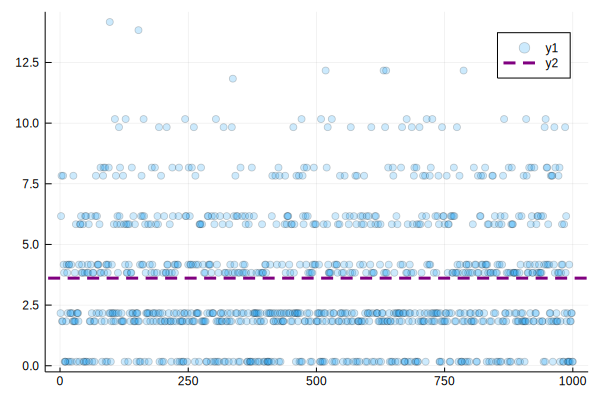

In [27]:
scatter(abs_data, alpha=0.2)

hline!([mean(abs_data)], lw=3, ls=:dash, c=:purple)

In [28]:
m = mean(abs_data)

count(abs_data .< m) / length(abs_data)

0.5

In [29]:
count(abs_data .< 2m) / length(abs_data)    # 2m instead of 2*m

0.878

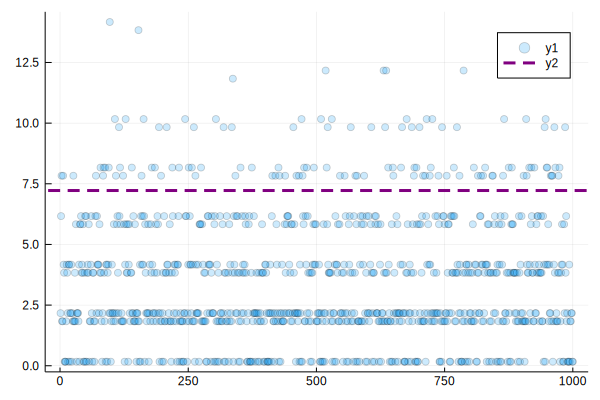

In [30]:
scatter(abs_data, alpha=0.2)

hline!([2*mean(abs_data)], lw=3, ls=:dash, c=:purple)

In [31]:
squared_data = data.^2;

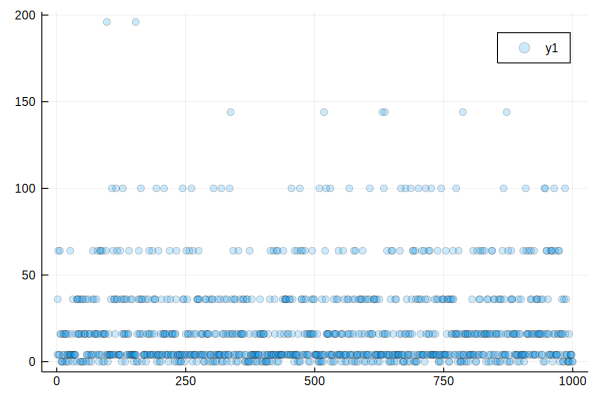

In [32]:
scatter(squared_data, alpha=0.2)

In [33]:
@time data = experiment(50, 10^6);

  1.096694 seconds (2 allocations: 7.629 MiB, 2.14% gc time)


In [34]:
using StatsBase

In [35]:
m = mean(data)

variance = mean((data .- m).^2)

σ = √(variance)  # \sigma<TAB>   # \sqrt<TAB>  # standard deviation

7.074816822830398

In [36]:
[(m - σ) < x < (m + σ) for x in data];

In [37]:
count((m - σ) .< data .< (m + σ)) / length(data)

0.677507

In [38]:
data2 = data[1:5_000];


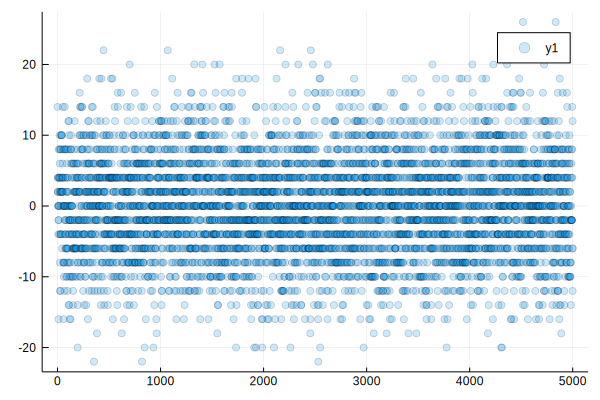

In [39]:
scatter(data2, alpha=0.2)

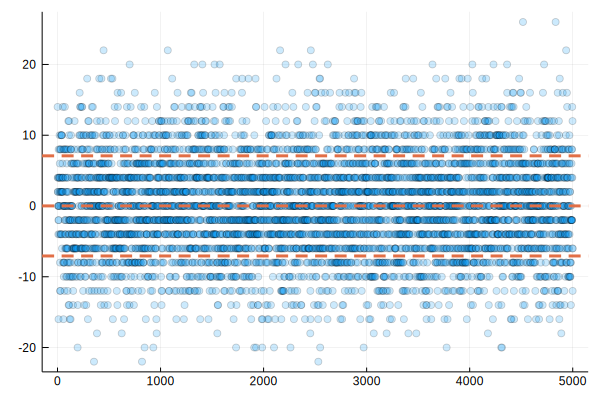

In [40]:
hline!([m, m+σ, m-σ], lw=3, ls=:dash, leg=false)

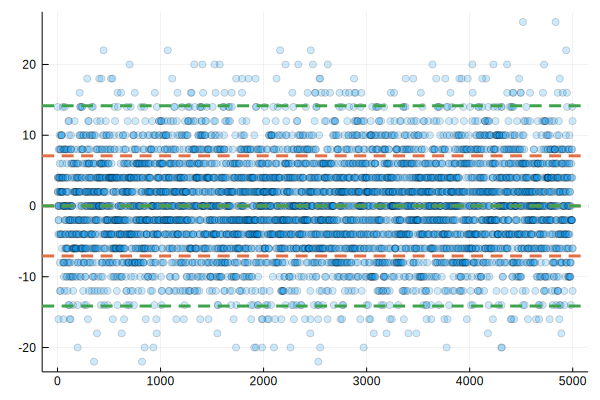

In [41]:
hline!([m, m+2σ, m-2σ], lw=3, ls=:dash, leg=false)

In [42]:
count((m - 2σ) .< data .< (m + 2σ)) / length(data)

0.967039

## Standard error of the mean

$N$ data points sampled from the same distribution, calculate the mean

In [43]:
num_steps = 20
N = 100

data = experiment(num_steps, N)

m = mean(data)

-0.58

In [44]:
num_steps = 20
N = 1000

data = experiment(num_steps, N)

m = mean(data)

0.128

In [45]:
using Statistics

In [46]:
σ = std(data)

4.597907867362801

$X_1 + X_2 + \cdots + X_N$

In [47]:
standard_error_of_mean = σ / √N

0.14539861332473822

In [48]:
mean_data = [mean(experiment(num_steps, N)) for i in 1:1000];


In [49]:
std(mean_data)

0.13619731865792958

In [50]:
mean_data = [mean(experiment(num_steps, 4N)) for i in 1:1000];

In [51]:
std(mean_data)

0.07094625233562707

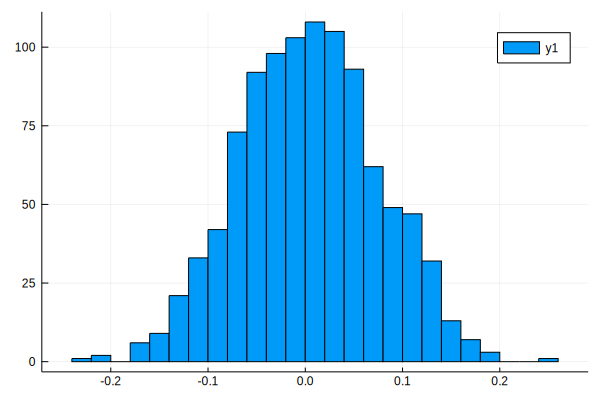

In [52]:
histogram(mean_data)

# Defining new types in Julia 

Random walker:

In [53]:
x = 0

x += 1

1

In [54]:
x2 = 0
x2 -= 1

-1

In [55]:
y = 0.0

y += randn()   # random number from a gaussian distribution

-1.2966653576933727

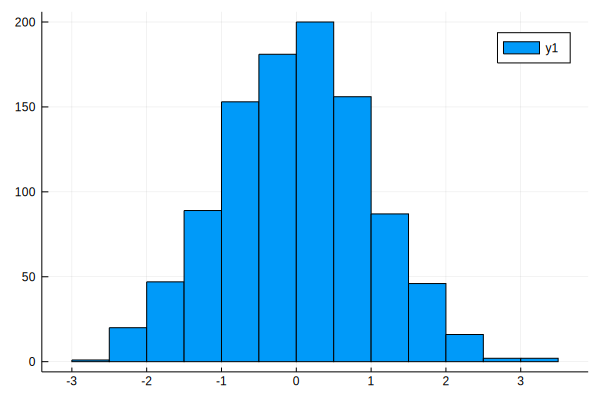

In [56]:
histogram(randn(1000))  # ziggurat algorithm for normally  distributed random numbers

# See also Distributions.jl 

How write **generic** code? A single `walk` function to generate random walk that works with discrete and continuous distributions

In [57]:
discrete_jump() = rand( (-1, +1 ))

continuous_jump() = randn()

continuous_jump (generic function with 1 method)

In [58]:
function walk(N)
    
    x = 0
    
    for i in 1:N
        x += jump()
    end
    
    return x
end

walk (generic function with 1 method)

In [ ]:
# DON'T DO THIS!

function walk(N, walker_type)
    
    if walker_type == "discrete"
        ...
        
end


In [59]:
function walk(N, jump)
    
    x = 0  # integer
    
    for i in 1:N
        x += jump()
    end
    
    return x
end

walk (generic function with 2 methods)

In [64]:
walk(20, discrete_jump)

-2

In [73]:
walk(20, continuous_jump)

-2.132419343700543

In [75]:
using Pkg; Pkg.add("BenchmarkTools")

   Updating registry at `C:\Users\chuan\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %0.0 % [==>                                      ]  4.5 %====>                                    ]  8.7 %Fetching: [======>                                  ]  13.2 %]  18.1 %==========>                              ]  23.2 %                            ]  28.1 %Fetching: [==============>                          ]  34.2 % [================>                        ]  39.8 %]  45.2 %]  50.0 %                  ]  54.4 %7 % [==============================>          ]  74.2 %>       ]  81.8 %9 %    ]  89.4 %=======================================> ]  95.3 %

  Resolving package versions...
  Installed BenchmarkTools ─ v0.5.0
   Updating `C:\Users\chuan\.julia\environments\v1.4\Project.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0
   Updating `C:\Users\chuan\.julia\environments\v1.4\Manifest.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0


In [76]:
using BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1260


In [77]:
@btime walk(20, discrete_jump)

  253.698 ns (0 allocations: 0 bytes)


4

In [78]:
@btime walk(20, continuous_jump)

  322.068 ns (0 allocations: 0 bytes)


3.1825305601311964

In [79]:
function walk(N, jump, x0)
    
    x = x0
    
    for i in 1:N
        x += jump()
    end
    
    return x
end

walk (generic function with 3 methods)

In [80]:
walk(20, continuous_jump, 0.0)

0.4348417407302707

## Custom types / user-defined types / composite types

Julia has **objects** (of user-defined types), but **not** object-oriented prog lang

In [81]:
struct MyDiscreteRandomWalker
    x::Int   # type annotation: x is of type Integer
end

"Box with data inside"

To make an object of this type:

In [82]:
MyDiscreteRandomWalker

MyDiscreteRandomWalker

In [83]:
w = MyDiscreteRandomWalker(10)

MyDiscreteRandomWalker(10)

In [84]:
w

MyDiscreteRandomWalker(10)

In [85]:
w.x  # the variable x that lives inside the **object** w

10

Move the walker:


In [86]:
w.x = w.x + 1

ErrorException: setfield! immutable struct of type MyDiscreteRandomWalker cannot be changed

In [87]:
mutable struct MyDiscreteRandomWalker2
    x::Int   # type annotation: x is of type Integer
end

In [88]:
w = MyDiscreteRandomWalker2(10)

MyDiscreteRandomWalker2(10)

In [89]:
w.x += 1

11

In [90]:
jump!(w::MyDiscreteRandomWalker2) = w.x += rand( (-1, +1) )

jump! (generic function with 1 method)

In [91]:
function jump!(w::MyDiscreteRandomWalker2)  # takes arg of type MyDiscreteRandomWalker2
    w.x += rand( (-1, +1) )
    return w
end

jump! (generic function with 1 method)

In [92]:
w

MyDiscreteRandomWalker2(11)

In [93]:
jump!(w)

MyDiscreteRandomWalker2(12)

In [94]:
w

MyDiscreteRandomWalker2(12)

In [95]:
function walk!(w::MyDiscreteRandomWalker2, N)
    for i in 1:N
        jump!(w)
    end
end

walk! (generic function with 1 method)

In [96]:
w

MyDiscreteRandomWalker2(12)

In [97]:
w = MyDiscreteRandomWalker2(0)

MyDiscreteRandomWalker2(0)

In [98]:
MyDiscreteRandomWalker2() = MyDiscreteRandomWalker2(0)

MyDiscreteRandomWalker2

In [99]:
methods(MyDiscreteRandomWalker2)

# 3 methods for type constructor:
[1] MyDiscreteRandomWalker2() in Main at In[98]:1
[2] MyDiscreteRandomWalker2(x::Int64) in Main at In[87]:2
[3] MyDiscreteRandomWalker2(x) in Main at In[87]:2

In [100]:
w = MyDiscreteRandomWalker2()

MyDiscreteRandomWalker2(0)

In [101]:
w2 = MyDiscreteRandomWalker2()

MyDiscreteRandomWalker2(0)

In [102]:
walk!(w, 1)

In [103]:
w

MyDiscreteRandomWalker2(1)

In [104]:
w2

MyDiscreteRandomWalker2(0)

In [105]:
w.x

1

In [106]:
w2.x

0